In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
import math
import numpy as np
import torch as t
import torch.utils.data as tdata
import matplotlib.pyplot as plt
from einops import rearrange
from dots.training import *
from dots.trainhooks import *
from dots.models import MLP
from dots.dots import *
from dots.utils import *
from dots.plotting import *

In [2]:
def get_model(wandb_run_name):
    return t.load(
        f"../models/{wandb_run_name}.pt",
        map_location=get_device())

# good relu

In [3]:
good_relu = get_model("mild-sweep-3")

In [4]:
good_relu

MLP(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [5]:
list(good_relu.parameters())

[Parameter containing:
 tensor([[-0.1923],
         [ 0.4593],
         [-0.7197],
         [-0.3387],
         [-0.7292],
         [-0.0743],
         [ 0.2783],
         [-0.9279],
         [-1.4241],
         [-0.2442]], requires_grad=True),
 Parameter containing:
 tensor([-2.7413e-01,  4.5852e-01,  7.1943e-01,  3.3860e-01, -7.8919e-01,
         -2.0376e-01,  3.7681e-01,  9.2642e-01, -2.6128e-06, -5.7862e-01],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0909,  0.6332, -0.4842, -0.1158,  0.0303,  0.0342, -0.0055, -0.3481,
           0.7022, -0.1073]], requires_grad=True),
 Parameter containing:
 tensor([0.4218], requires_grad=True)]

/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


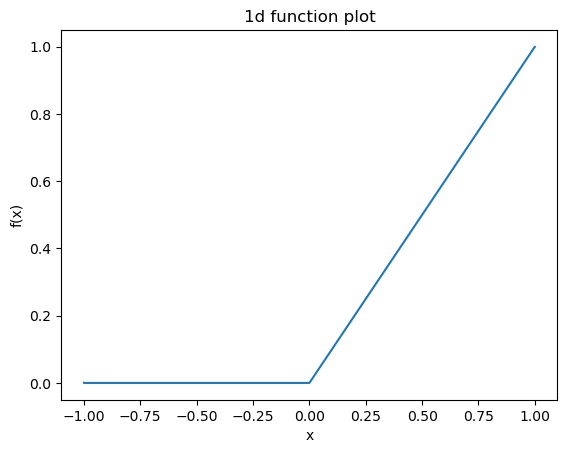

In [6]:
plot_1d_fn(good_relu, -1, 1, 1000)

# best hfsin

In [10]:
hfsin = get_model("fancy-sweep-64")

In [17]:
hfsin.count_params()

8513

In [18]:
hfsin

MLP(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


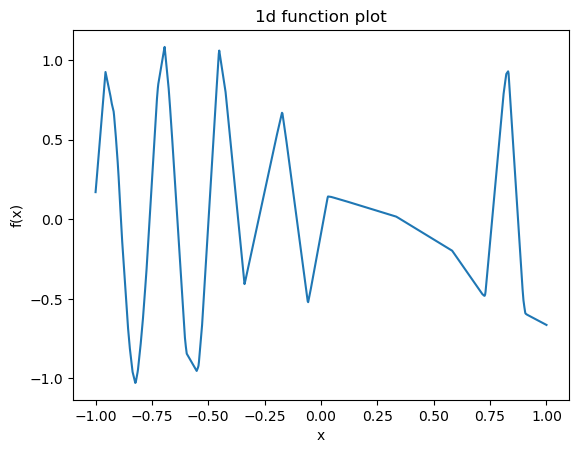

In [11]:
plot_1d_fn(hfsin)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:108: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


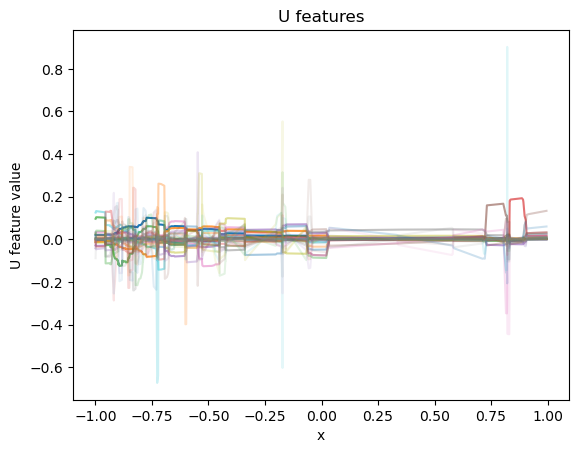

In [12]:
plot_1d_u_feats(hfsin, range_batch(-1, 1, 1000, sort=True))

Assuming trainplot_1d got a model, not a trainstate


/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


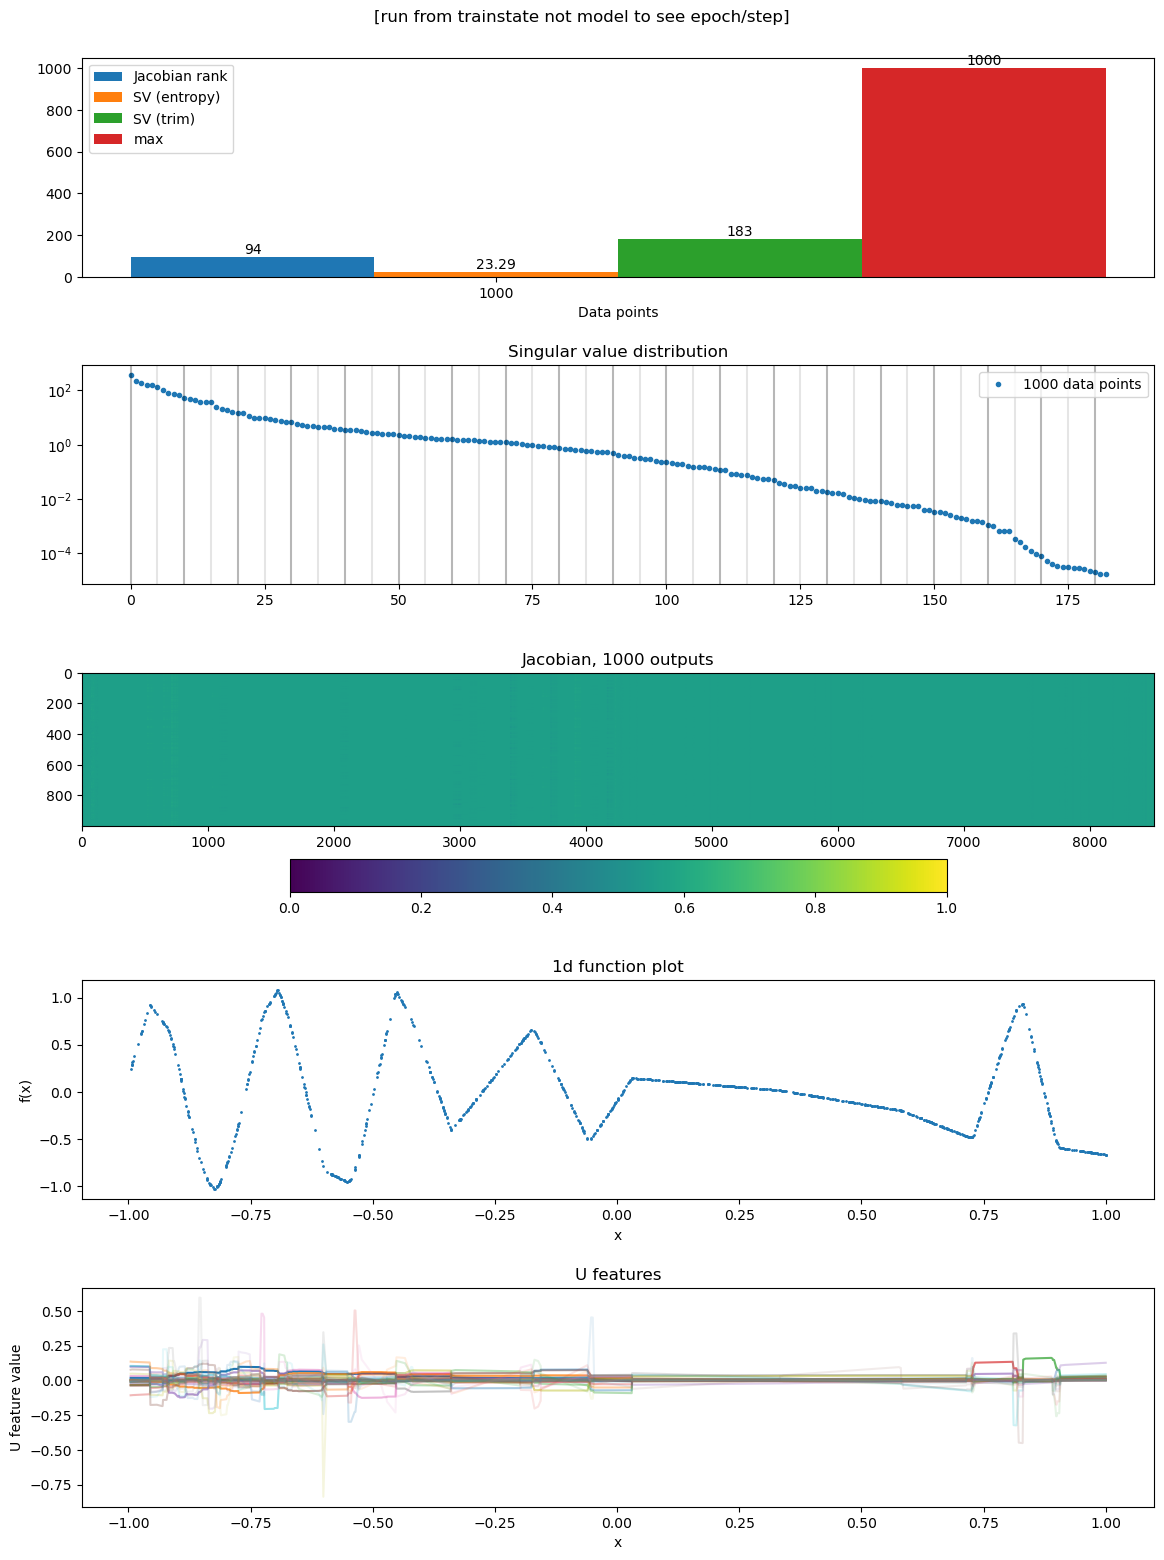

In [19]:
fig = trainplot_1d(hfsin)

# Good square

In [20]:
square = get_model("worthy-sweep-32")

In [30]:
square

MLP(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=1, bias=True)
  )
)

/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


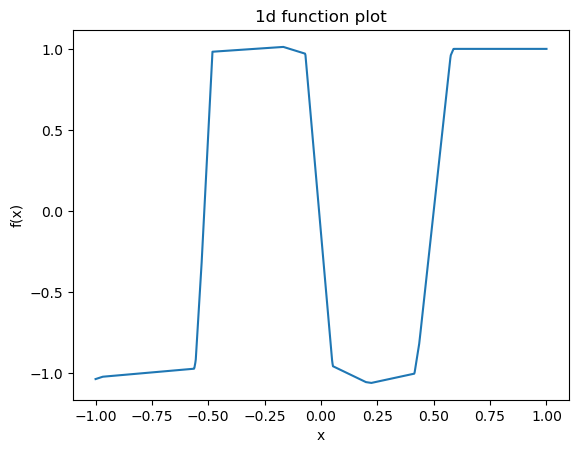

In [21]:
plot_1d_fn(square)

Assuming trainplot_1d got a model, not a trainstate


/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


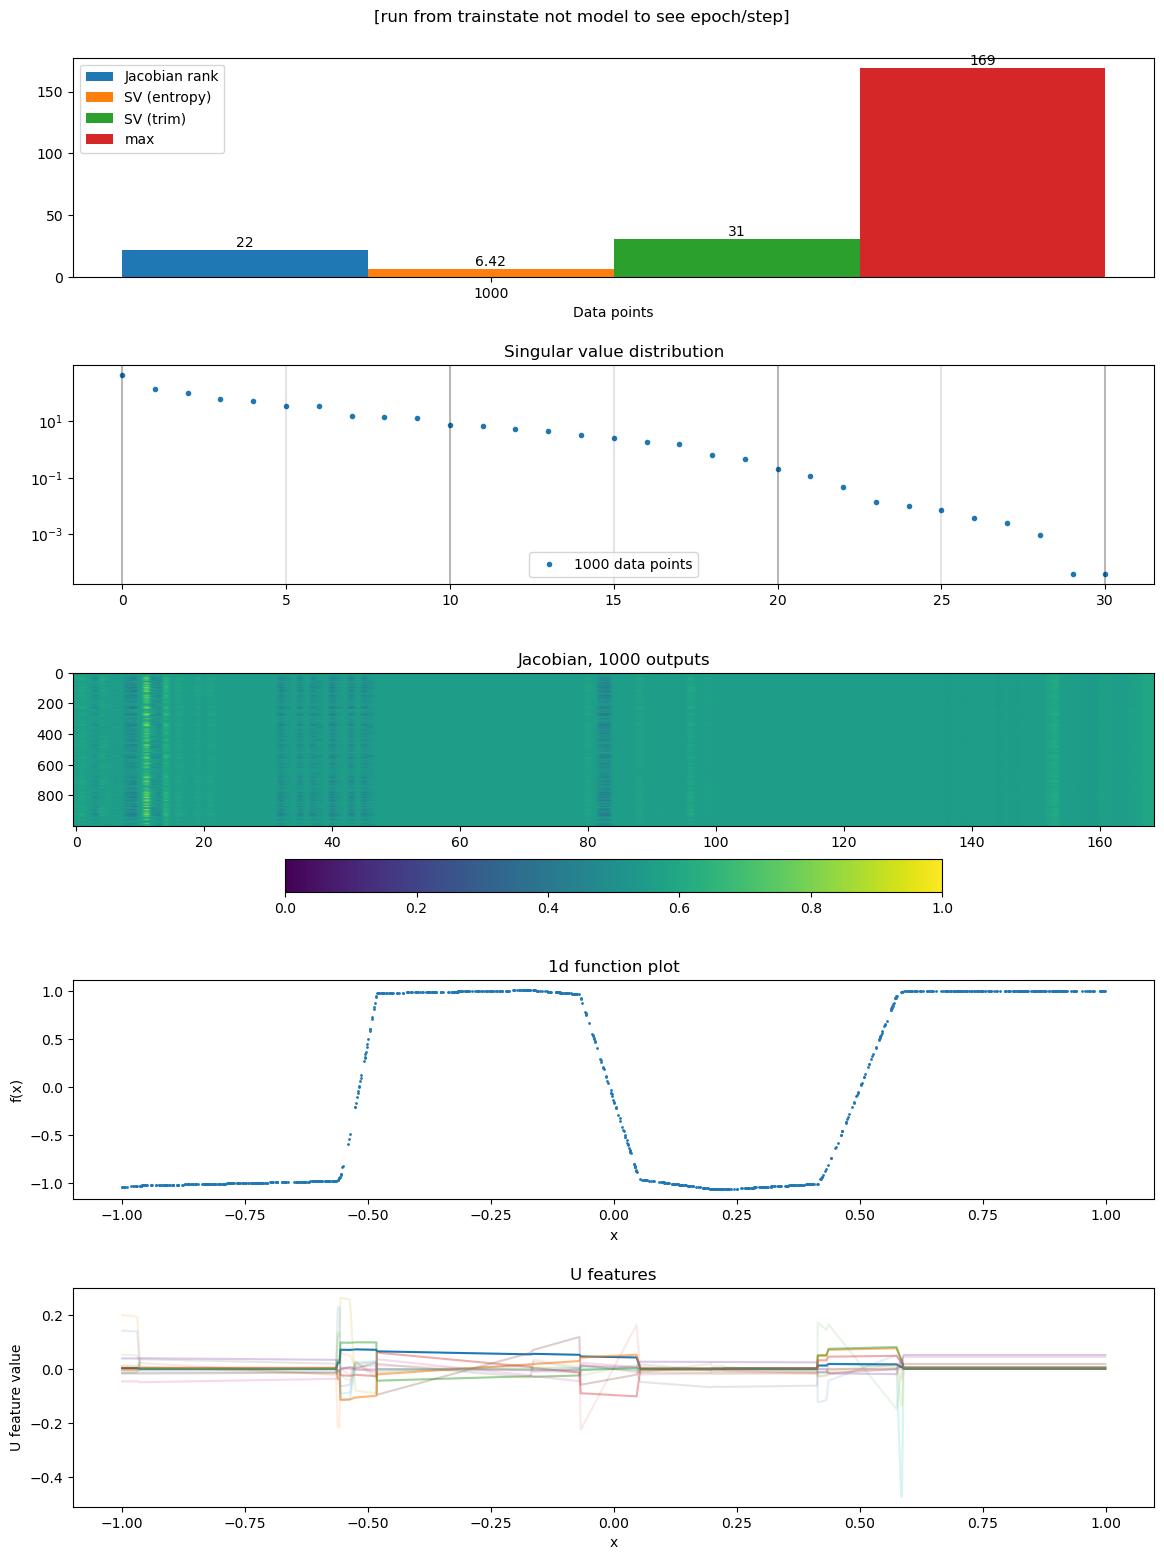

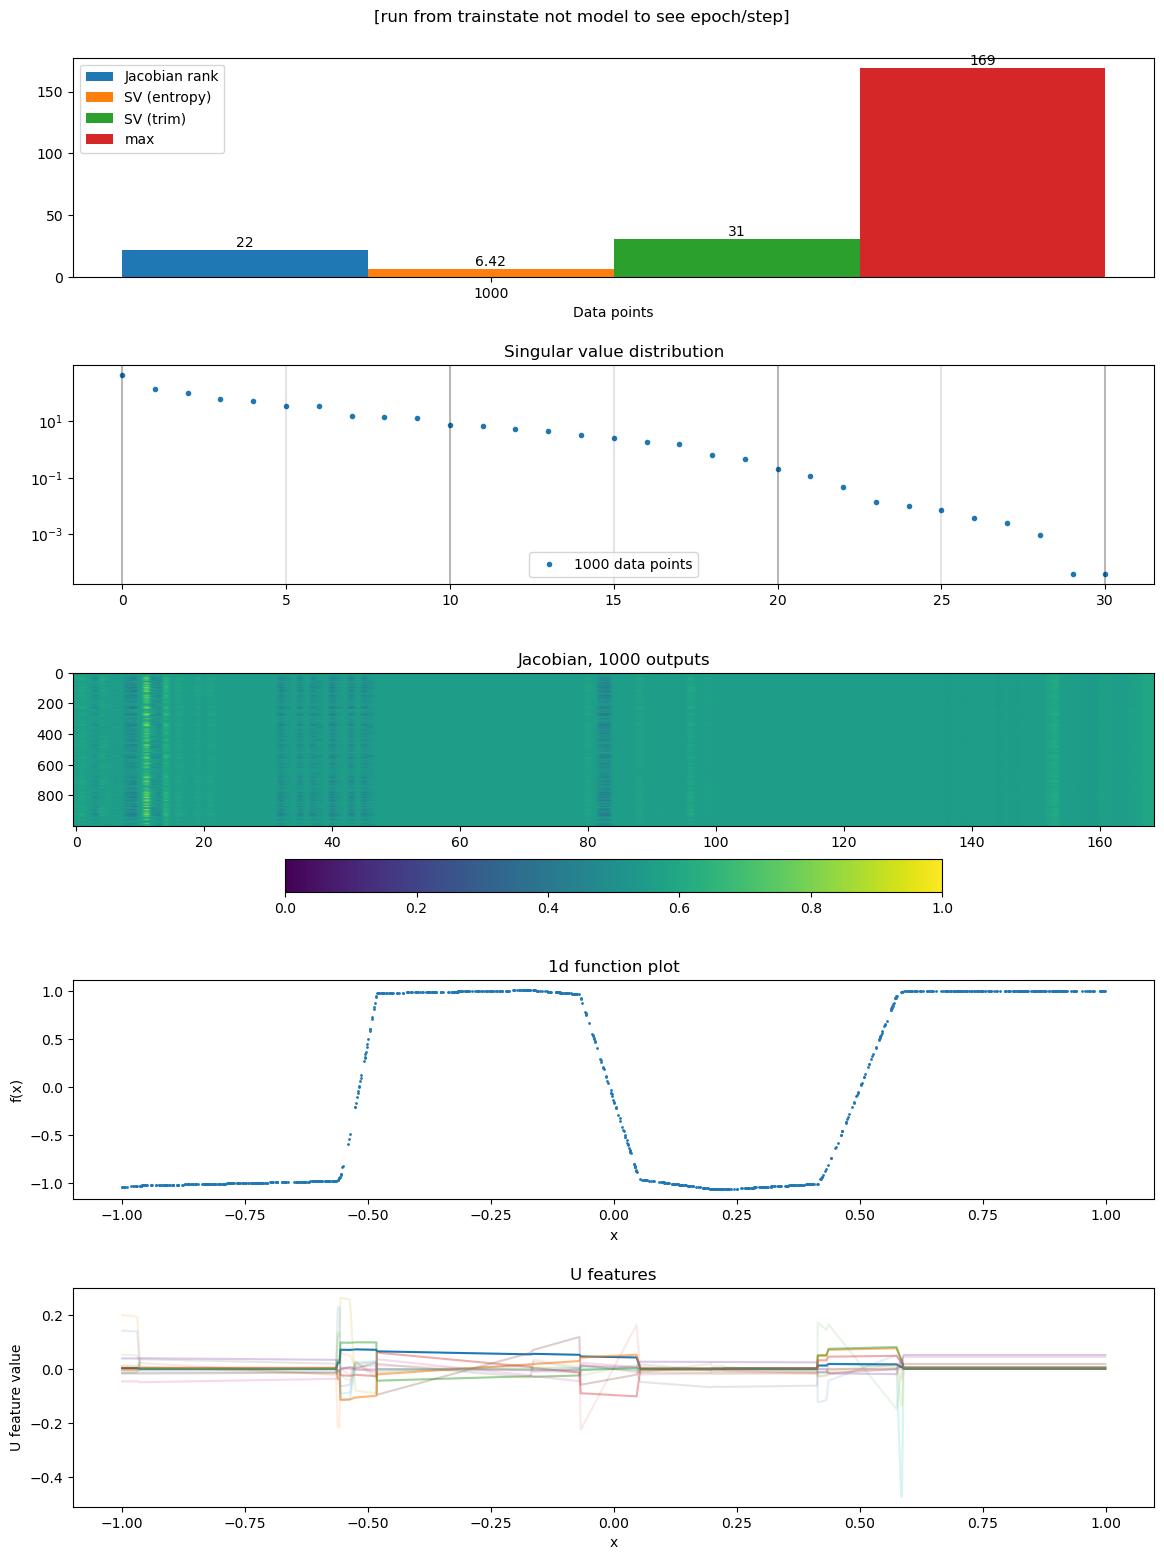

In [22]:
trainplot_1d(square)

In [27]:
jac = square.matrix_jacobian(range_batch(-1, 1, 1000, sort=True))

# best hfsin2andblock

In [3]:
from dots.datasets import hfsin2andblock

In [4]:
hfsin = load_model("solar-sweep-7_model_06139", loc="out")

/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


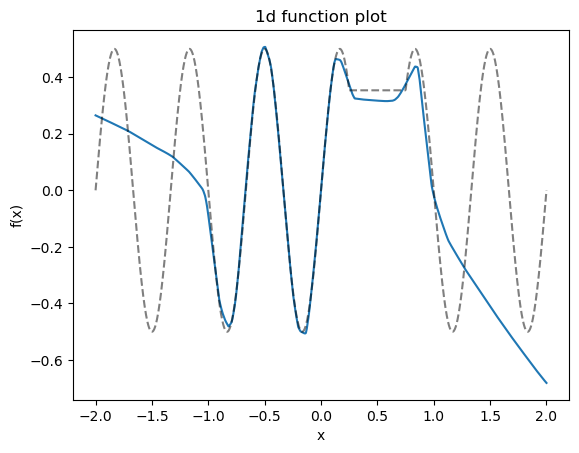

In [5]:
plot_1d_fn([hfsin, hfsin2andblock], start=-2, end=2)

In [9]:
t.linalg.svd(hfsin.matrix_jacobian(range_batch(-2, 2, 1000, sort=True)))

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


torch.return_types.linalg_svd(
U=tensor([[-0.0320, -0.0308, -0.0489,  ..., -0.0060,  0.1388,  0.0641],
        [-0.0320, -0.0308, -0.0489,  ..., -0.0183, -0.2109, -0.1340],
        [-0.0320, -0.0308, -0.0489,  ..., -0.0017,  0.1156,  0.1732],
        ...,
        [-0.0388,  0.0522, -0.0216,  ..., -0.0188,  0.0284, -0.0086],
        [-0.0388,  0.0522, -0.0216,  ...,  0.0154, -0.0144,  0.0368],
        [-0.0388,  0.0522, -0.0216,  ..., -0.0258, -0.0180,  0.0124]]),
S=tensor([1.0364e+02, 8.9502e+01, 5.7213e+01, 3.9247e+01, 3.1637e+01, 2.7232e+01,
        2.4854e+01, 2.2020e+01, 1.4454e+01, 1.2311e+01, 1.1386e+01, 1.0890e+01,
        1.0212e+01, 7.6162e+00, 6.8132e+00, 6.6155e+00, 6.1420e+00, 5.9720e+00,
        5.5838e+00, 5.1317e+00, 5.0401e+00, 4.7047e+00, 4.2292e+00, 3.9438e+00,
        3.8382e+00, 3.6785e+00, 3.5627e+00, 3.2839e+00, 3.0953e+00, 3.0233e+00,
        2.6656e+00, 2.6207e+00, 2.4959e+00, 2.4750e+00, 2.3882e+00, 2.2870e+00,
        2.2133e+00, 2.1864e+00, 2.1767e+00, 2.1362

In [10]:
hfsin.jacobian_singular_values(range_batch(-2, 2, 1000, sort=True))

tensor([1.0335e+02, 8.9942e+01, 5.6351e+01, 3.8876e+01, 3.2514e+01, 2.7563e+01,
        2.6363e+01, 2.2652e+01, 1.3855e+01, 1.2184e+01, 1.1702e+01, 1.0804e+01,
        1.0282e+01, 7.7183e+00, 7.2521e+00, 6.6641e+00, 6.2006e+00, 5.9916e+00,
        5.5355e+00, 5.2301e+00, 4.8970e+00, 4.5107e+00, 4.0046e+00, 3.9550e+00,
        3.7742e+00, 3.5917e+00, 3.3894e+00, 3.1807e+00, 2.9231e+00, 2.8334e+00,
        2.8218e+00, 2.7330e+00, 2.6010e+00, 2.4935e+00, 2.4653e+00, 2.3153e+00,
        2.2902e+00, 2.2212e+00, 2.1730e+00, 2.0934e+00, 1.9673e+00, 1.8679e+00,
        1.8467e+00, 1.7998e+00, 1.7668e+00, 1.7298e+00, 1.6900e+00, 1.6686e+00,
        1.6126e+00, 1.5746e+00, 1.5326e+00, 1.5051e+00, 1.4793e+00, 1.4570e+00,
        1.4375e+00, 1.4228e+00, 1.3893e+00, 1.3566e+00, 1.3257e+00, 1.3099e+00,
        1.2806e+00, 1.2462e+00, 1.2037e+00, 1.1506e+00, 1.1243e+00, 1.1163e+00,
        1.0855e+00, 1.0702e+00, 1.0566e+00, 1.0133e+00, 9.9971e-01, 9.5543e-01,
        9.2395e-01, 9.0103e-01, 8.8000e-

Assuming trainplot_1d got a model, not a trainstate


/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


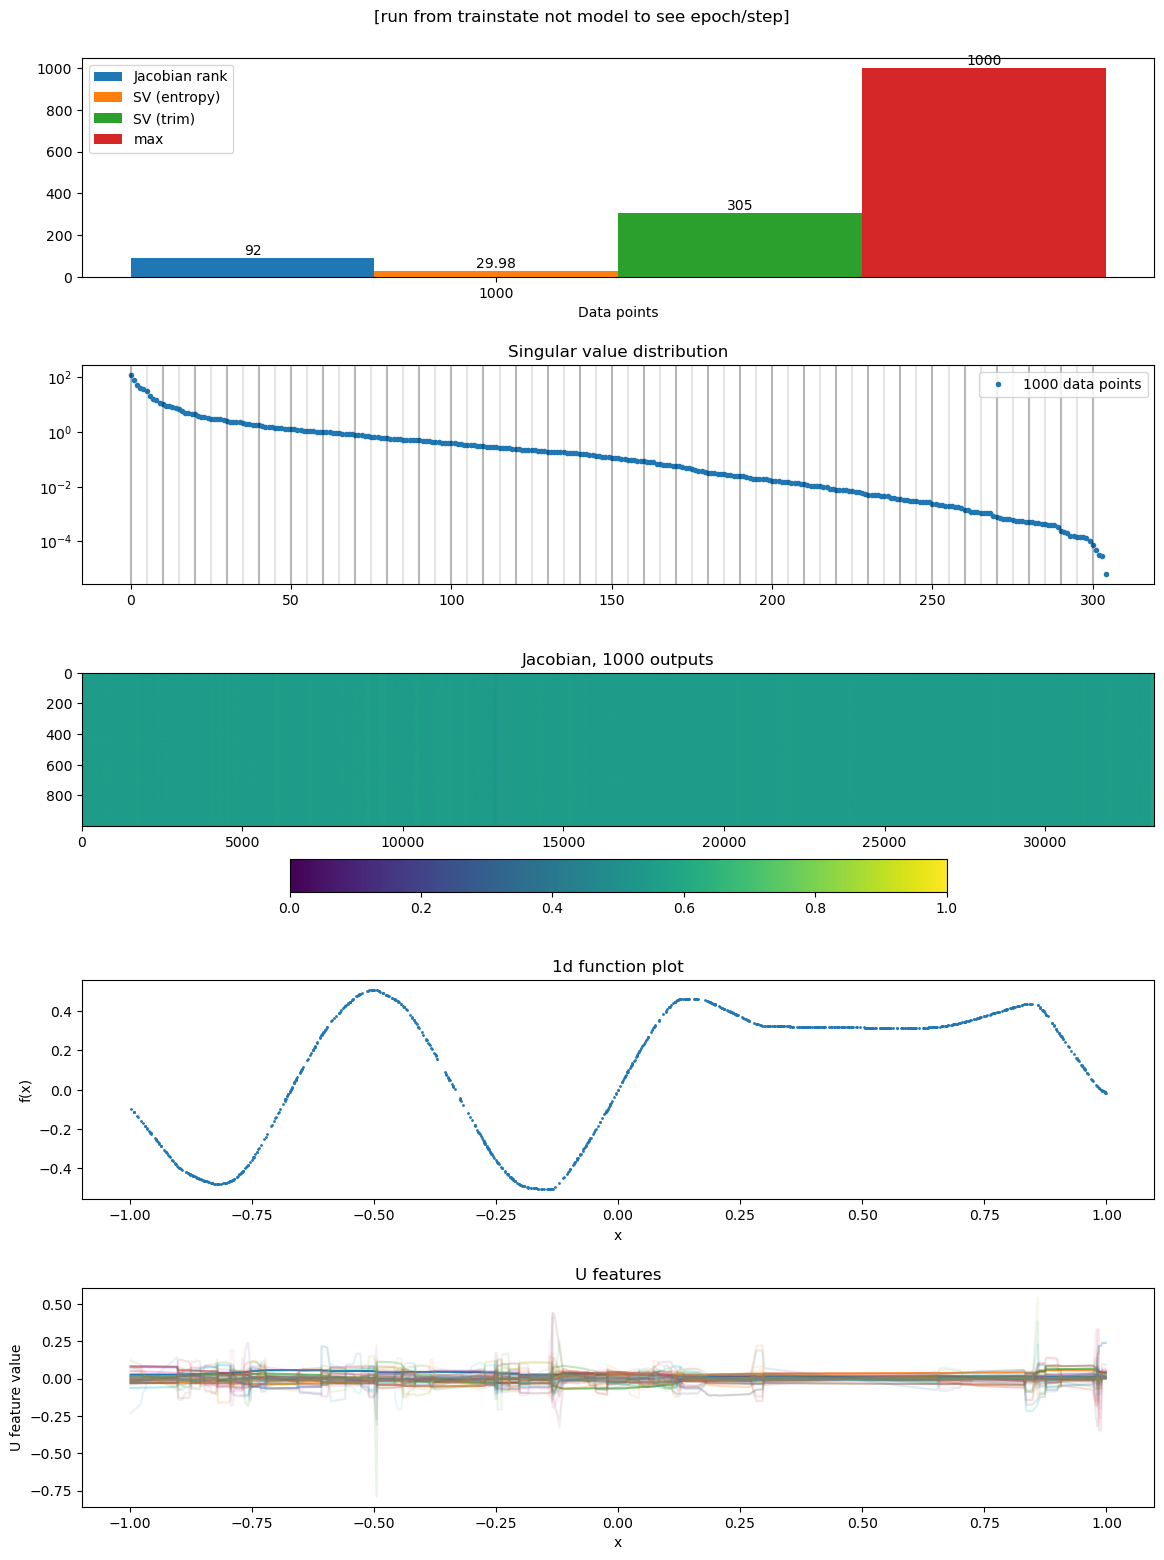

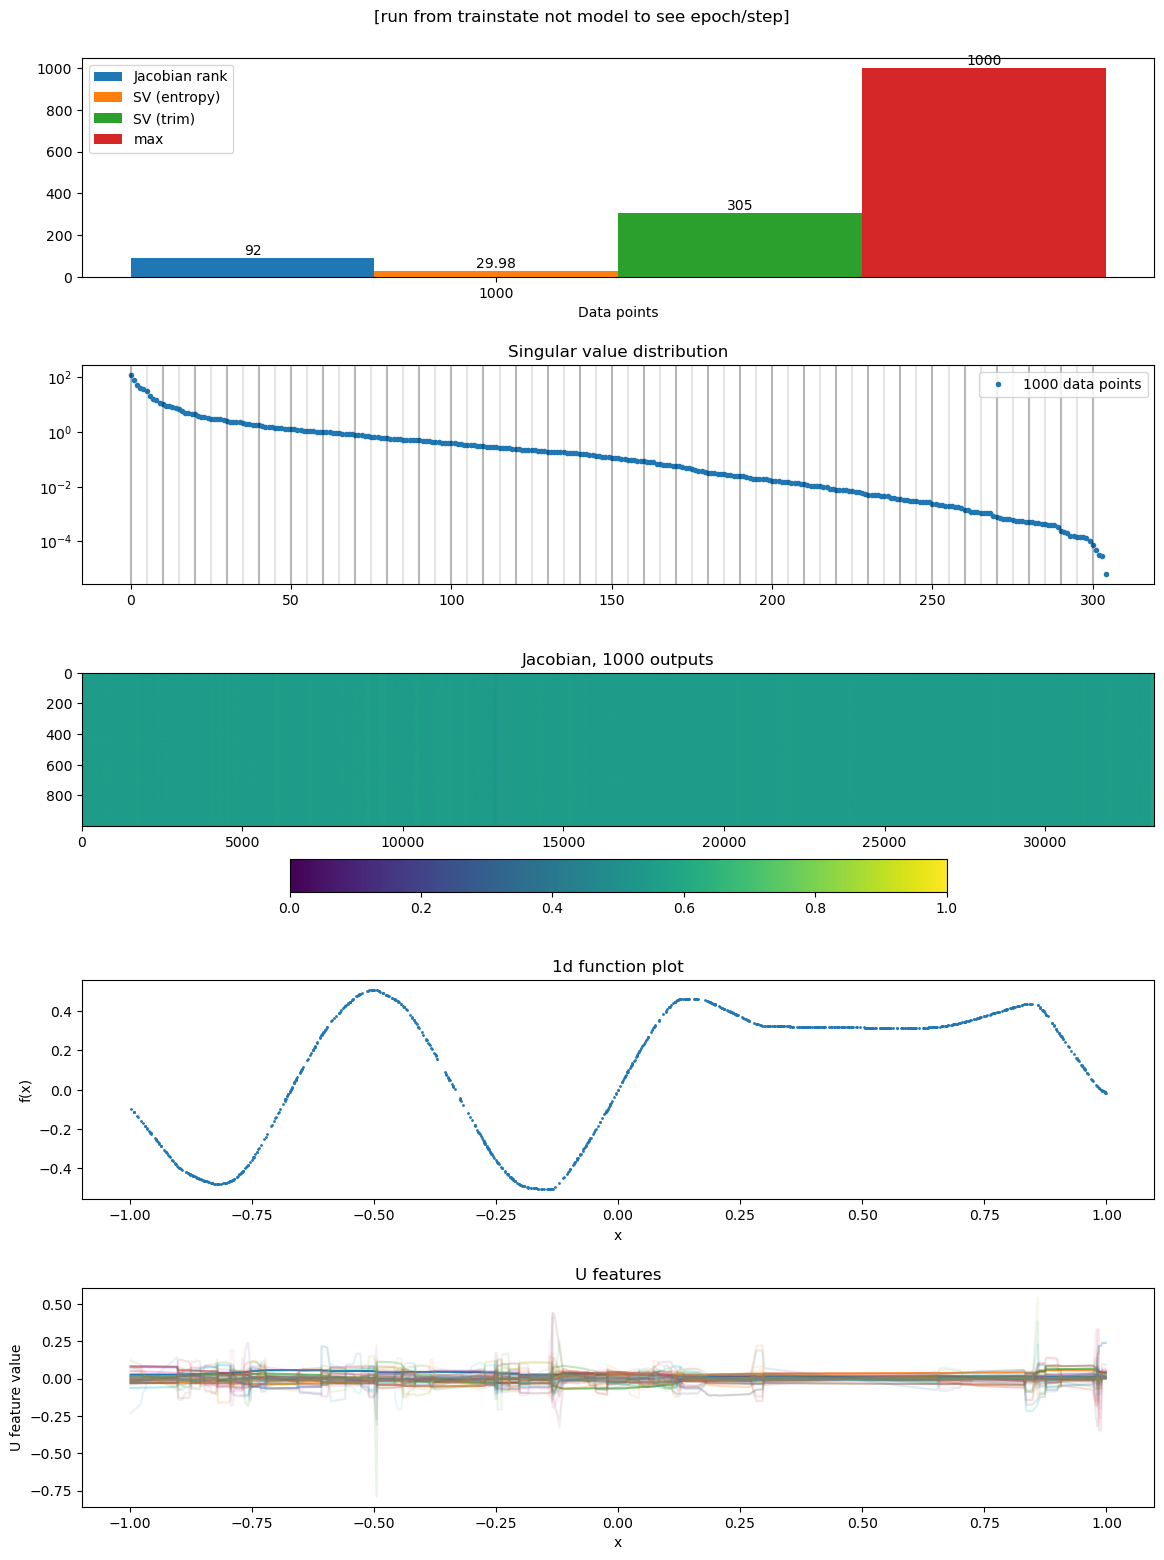

In [11]:
trainplot_1d(hfsin)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:143: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


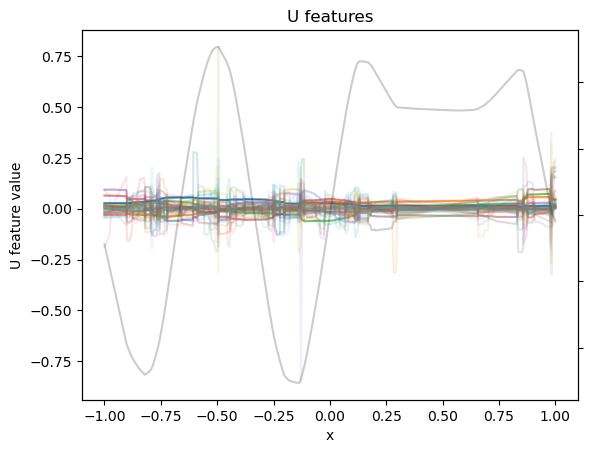

In [18]:
plot_1d_u_feats(hfsin, range_batch(-1, 1, 1000, sort=True), plot_fn=True)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


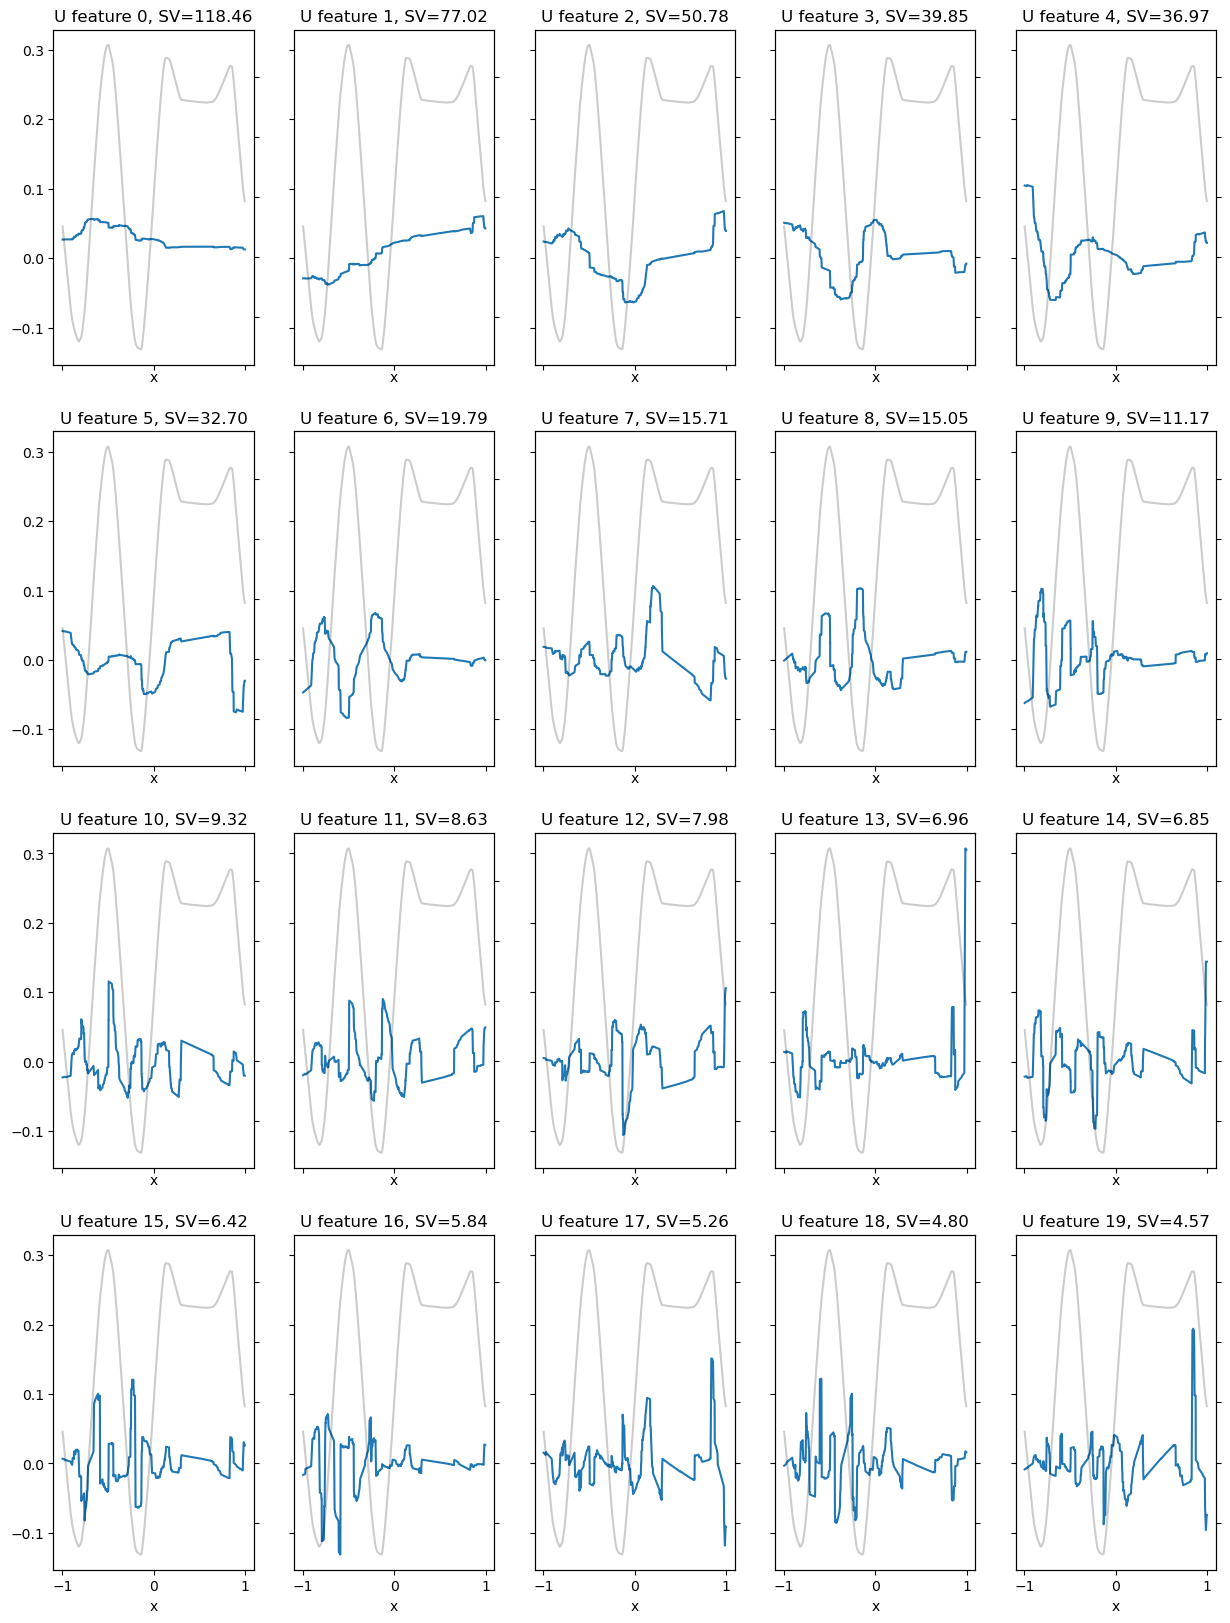

In [16]:
fig, axs = plt.subplots(4, 5, figsize=(15, 20), sharex=True, sharey=True)
axs = axs.flatten()
plot_1d_u_feats(hfsin, range_batch(-1, 1, 1000), plot_fn=True, max_feats=len(axs), flip="function", ax=axs)

In [17]:
hfsin

MLP(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)

## Previously in training:

In [19]:
hfsint = load_model("solar-sweep-7_model_00613", loc="out")

In [21]:
hfsint

MLP(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


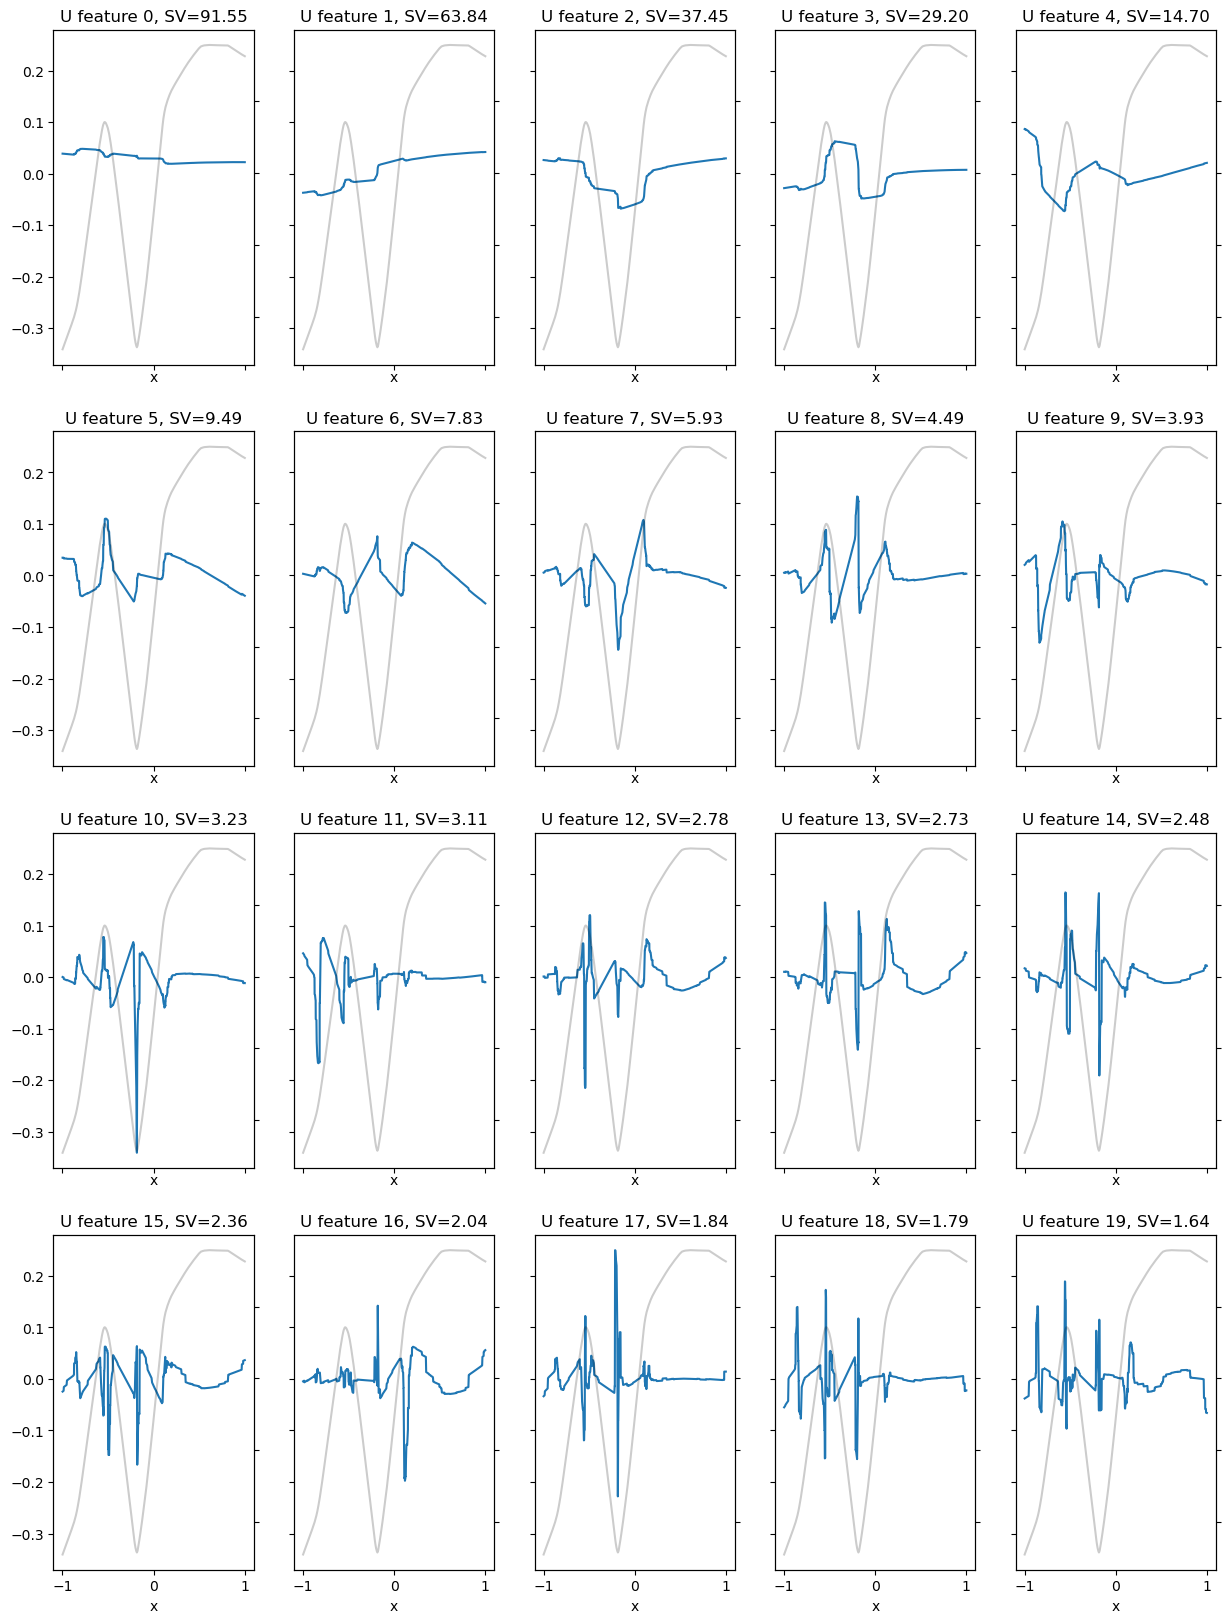

In [20]:
fig, axs = plt.subplots(4, 5, figsize=(15, 20), sharex=True, sharey=True)
axs = axs.flatten()
plot_1d_u_feats(hfsint, range_batch(-1, 1, 1000), plot_fn=True, max_feats=len(axs), flip="function", ax=axs)

## At init

In [22]:
hfsint0 = load_model("solar-sweep-7_model_00000", loc="out")

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


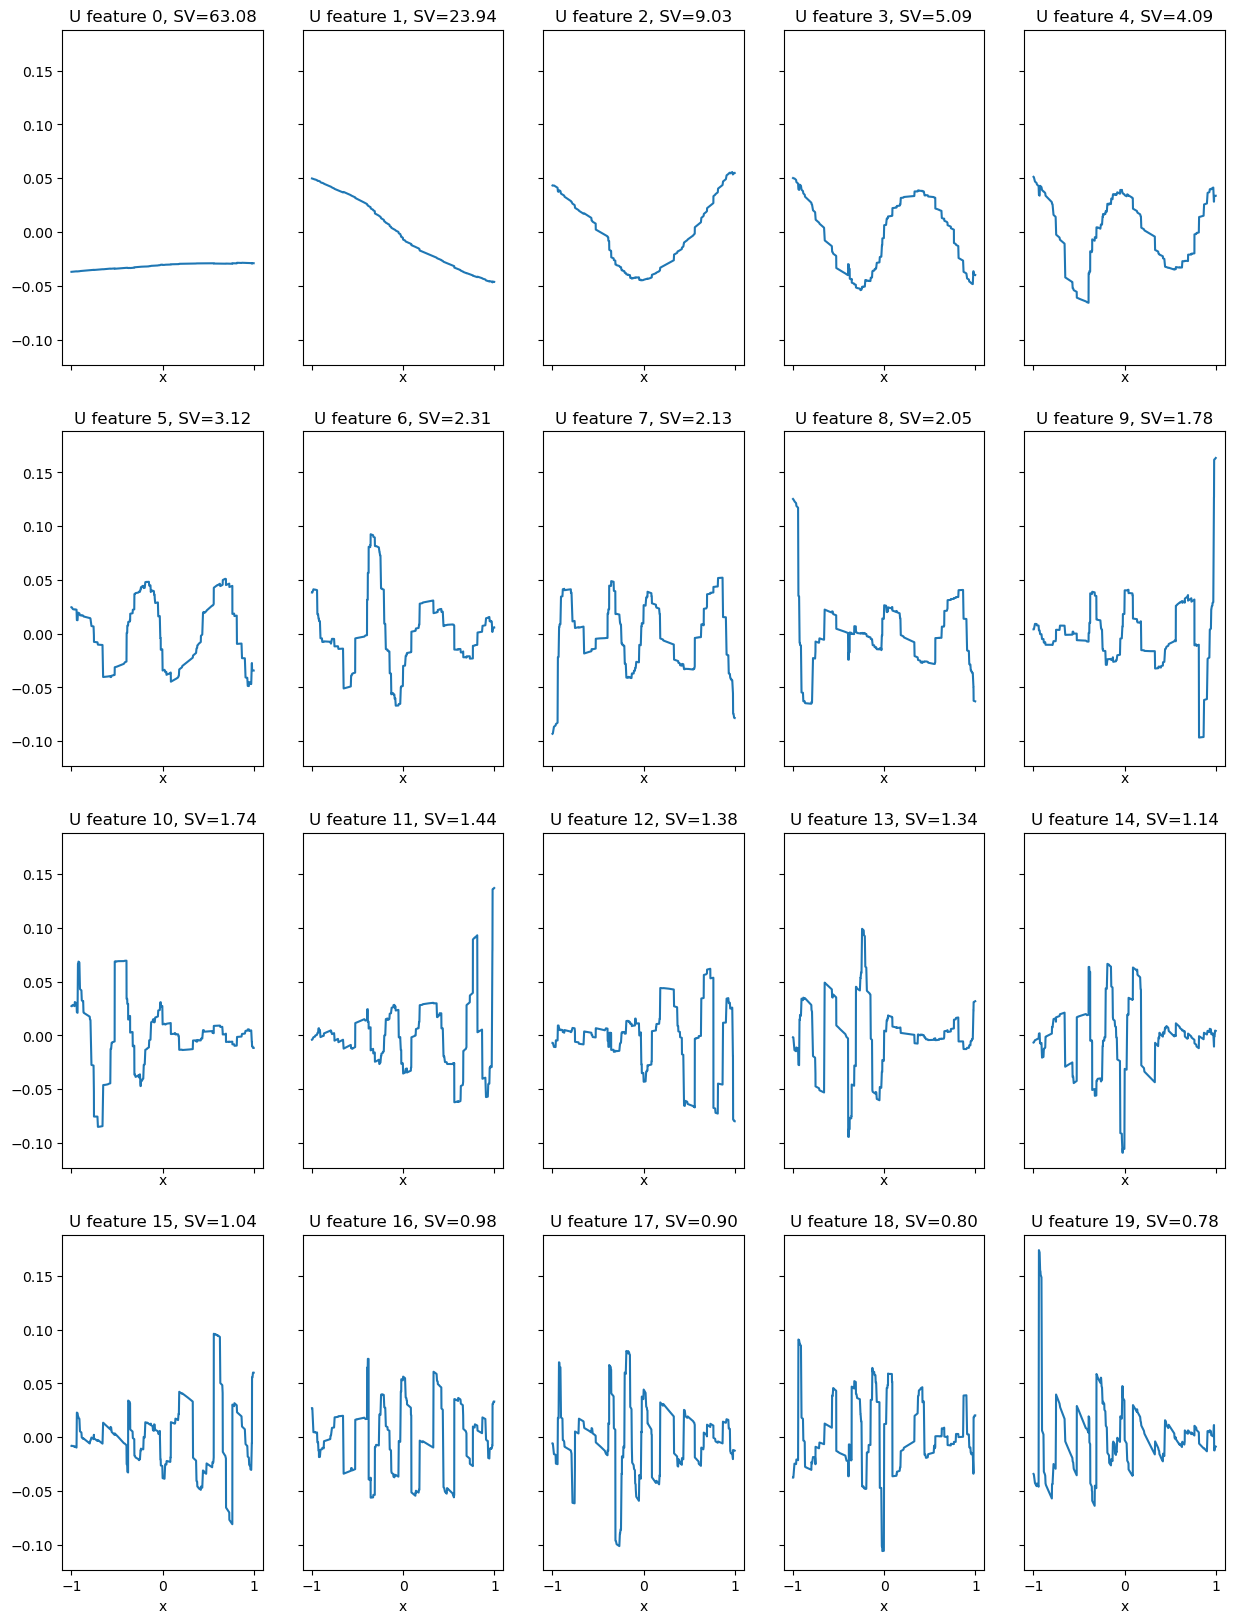

In [25]:
fig, axs = plt.subplots(4, 5, figsize=(15, 20), sharex=True, sharey=True)
axs = axs.flatten()
plot_1d_u_feats(hfsint0, range_batch(-1, 1, 1000), plot_fn=False, max_feats=len(axs), flip="function", ax=axs)